<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/Boosting_method/02_GradientBoosting_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mushrooms.csv")

In [11]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['class']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth': [3,4,5]}
gb_model = GradientBoostingClassifier()

grid = GridSearchCV(gb_model,param_grid)

In [15]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [16]:
preds = grid.predict(X_test)

In [17]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [18]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [19]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [20]:
feat_importances = grid.best_estimator_.feature_importances_

In [21]:
imp_feat = pd.DataFrame(index= X.columns,
                        data = feat_importances,
                        columns = ['Importance'])
imp_feat

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,5.672541e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,4.440072e-17


In [23]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005].sort_values('Importance')

<Axes: xlabel='None', ylabel='Importance'>

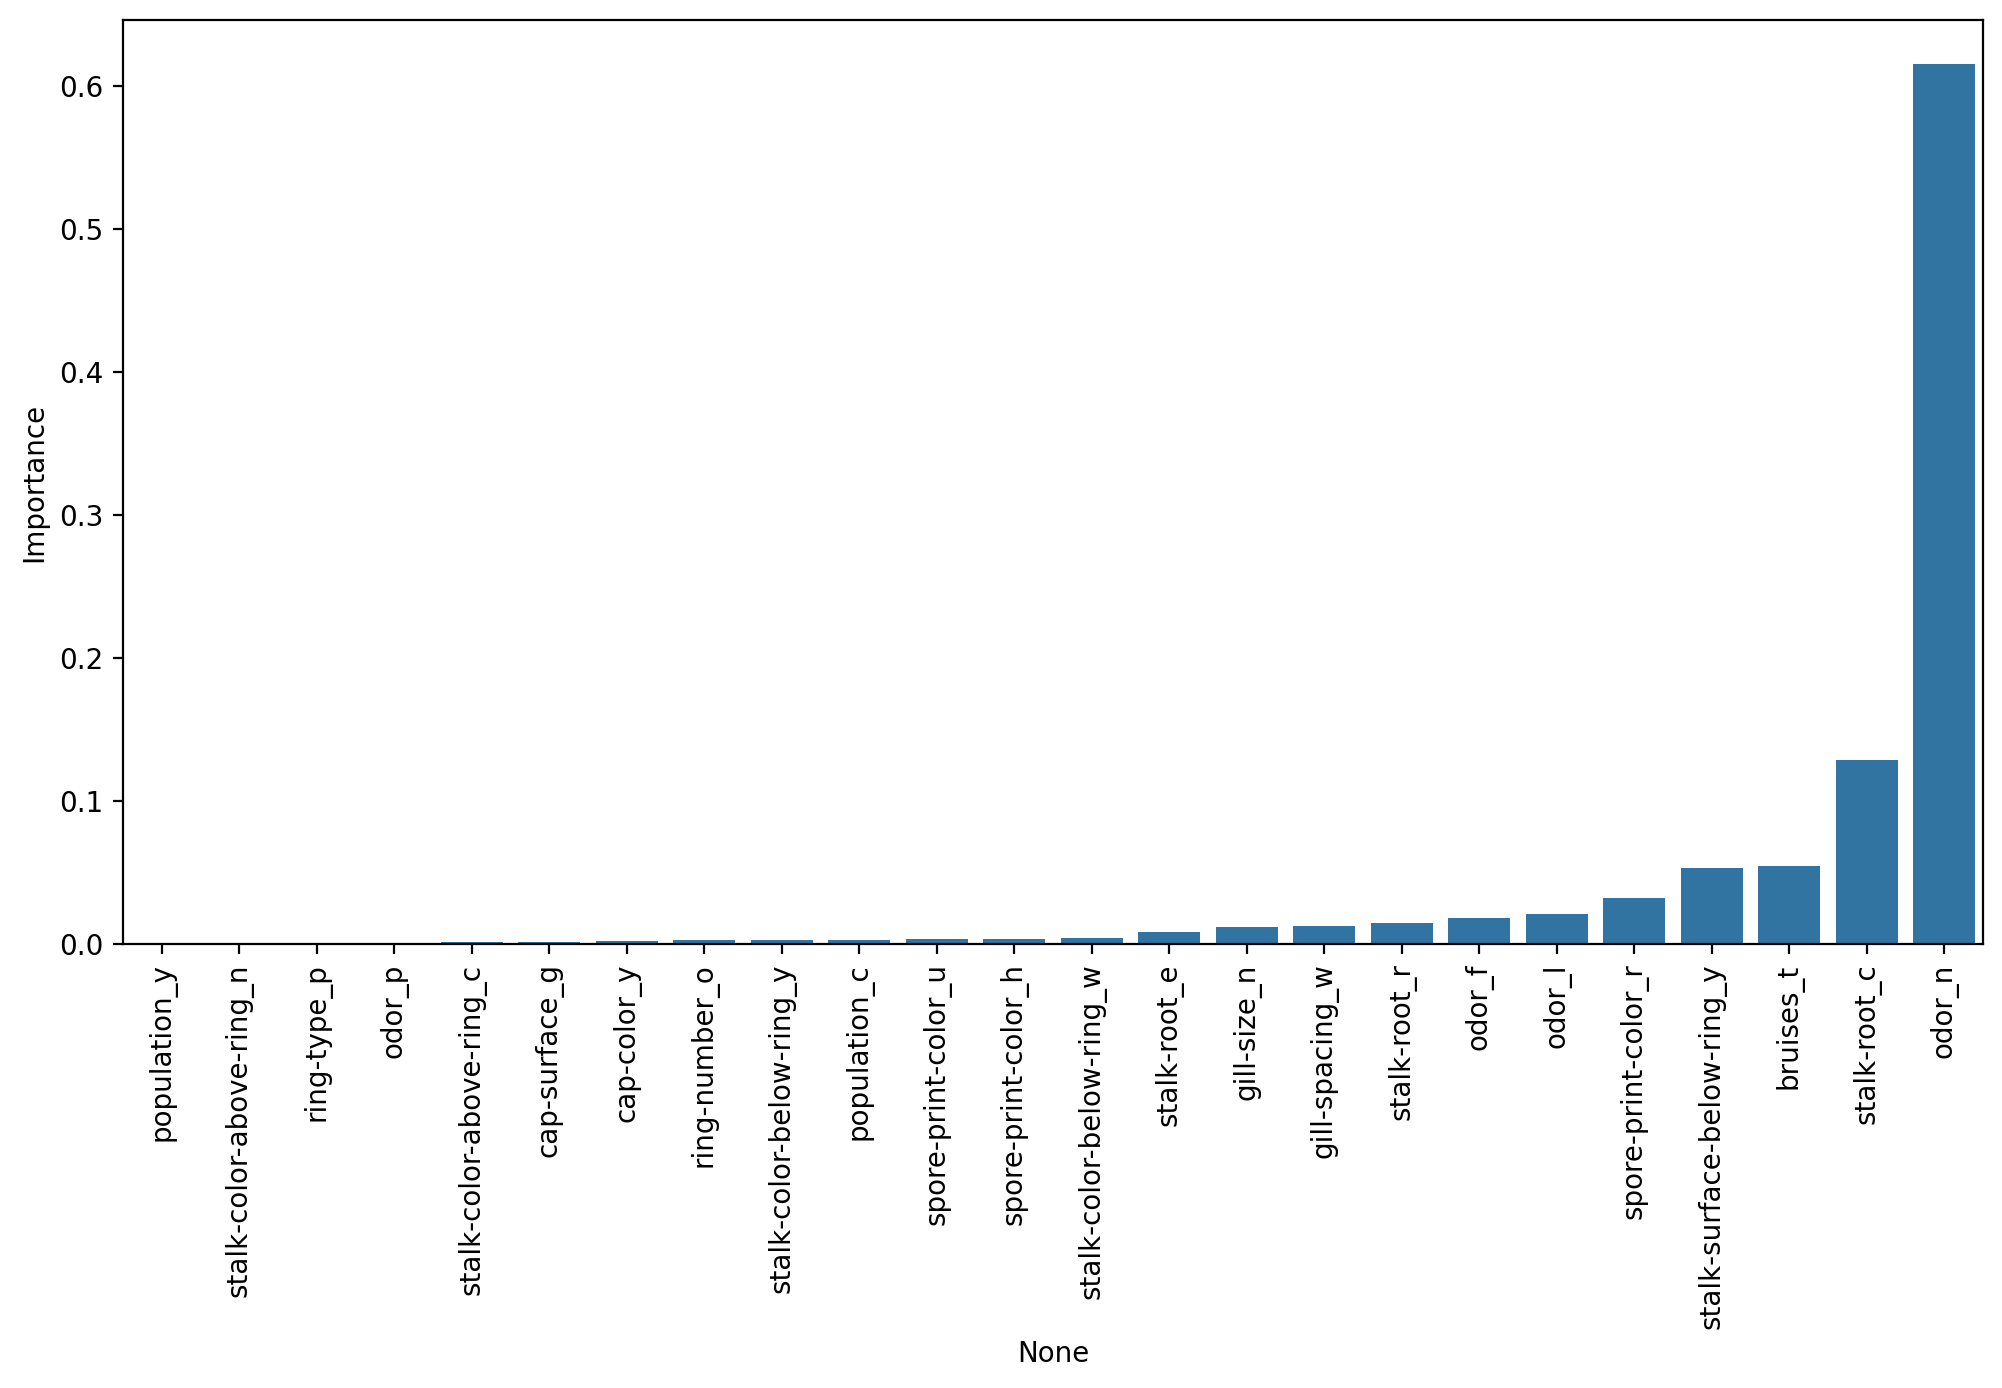

In [26]:
plt.figure(figsize = (12,6),dpi = 200)
plt.xticks(rotation=90)
sns.barplot(data = imp_feat,
            x = imp_feat.index,
            y = 'Importance')